In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt  
from scipy.stats import norm  
import keras
from keras.models import Sequential
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import UpSampling2D, Reshape, Lambda, Flatten, Activation
from keras.models import Model  
from keras.optimizers import SGD, Adadelta, Adagrad,Adam
from keras import backend as K  
from keras import objectives  
from keras.utils.vis_utils import plot_model  
from keras.utils import np_utils, generic_utils
import sys 
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
import sklearn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
from sklearn import metrics

Using TensorFlow backend.


In [2]:
path = os.listdir('cstor/xsede/users/xs-haosun/SDSS_2000/')
#pick up the 1st image to have a look   
path_now = path[0]
a = np.load('cstor/xsede/users/xs-haosun/SDSS_2000/'+str(path_now))
Obj_ID = []
Image = []
Class = []
Redshift = []
for i in range(len(path)):
    path_now = path[i]
    a = np.load('cstor/xsede/users/xs-haosun/SDSS_2000/'+str(path_now))
    for j in range(a.shape[0]):
        Obj_ID.append(a[j]['objID'])
        Image.append(a[j]['image'])
        Class.append(a[j]['class'])
        Redshift.append(a[j]['z'])
Obj_ID = np.asarray(Obj_ID)
Image = np.asarray(Image)
Class = np.asarray(Class)
Redshift = np.asarray(Redshift)
Class[Class=='STAR'] = 0
Class[Class=='GALAXY'] = 1
Class[Class=='QSO'] = 2
Class = Class.astype(int)

Image_RGB = np.empty((len(Image),64,64,3))#(14142,64,64,3) RGB images
for i in range(len(Image)):
    #b[i] = np.stack((a[i][1][0],a[i][1][1],a[i][1][2],a[i][1][3],a[i][1][4]),axis=-1)
    Image_RGB[i] = np.stack((Image[i][3],Image[i][2],Image[i][1]),axis=-1)


for i in range(len(Image_RGB)):
    if True in np.isnan(Image_RGB[i]).reshape(64*64*3):
        print(i)
        Image_RGB[i][np.isnan(Image_RGB[i])==True]=np.mean(Image_RGB[i-1])
        
Image_RGB -= np.mean(Image_RGB)
Image_RGB /= np.max(Image_RGB)

8645


In [3]:
label = np_utils.to_categorical(Class, 3)
data = Image_RGB
index = [i for i in range(len(data))]
#random.shuffle(index)
train_data = data[index]
train_label = label[index]
Class = Class[index]
Redshift = Redshift[index]
print('train_data.shape:',train_data.shape)
print('train_label.shape:',train_label.shape)

train_data.shape: (14142, 64, 64, 3)
train_label.shape: (14142, 3)


Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 15s - loss: -7351.2863 - val_loss: -7854.3271
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7858.1884 - val_loss: -8023.2289
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7958.3227 - val_loss: -7977.7340
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7983.4183 - val_loss: -8063.5445
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -7993.6950 - val_loss: -7953.3041
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8006.0543 - val_loss: -8067.1949
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8002.2423 - val_loss: -8032.8990
Epoch 8/50
12000/12000 [==============================] - 9s - loss: -8024.8831 - val_loss: -8054.7844
Epoch 9/50
12000/12000 [==============================] - 10s - loss: -8032.1291 - val_loss: -8056.3258
Epoch 10/50
1200

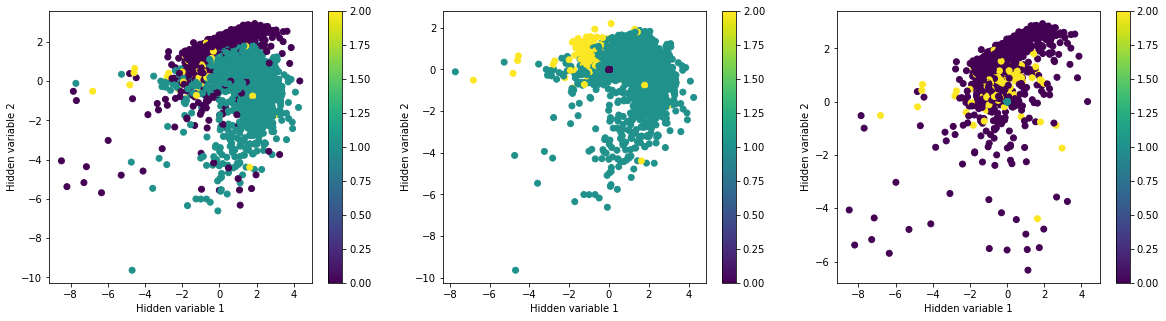

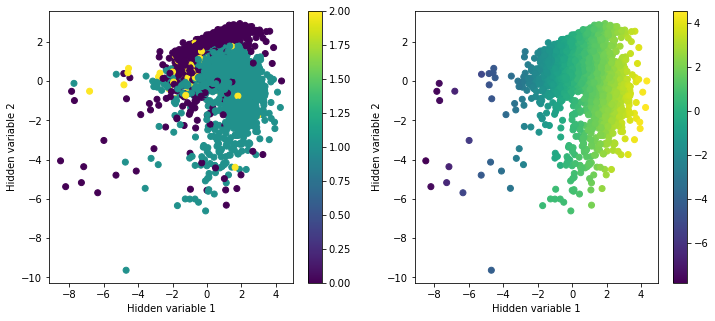

10000


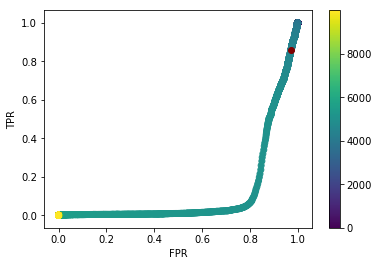

AUC: 0.115336907789
10000


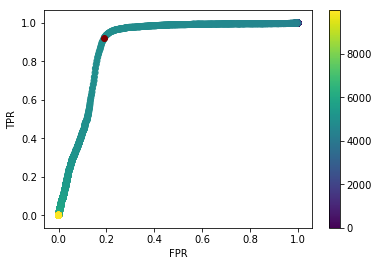

AUC: 0.884663092211
xunhuan =  0 this time, the AUC is: 0.884663092211
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7516.5760 - val_loss: -7987.6504
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7916.1092 - val_loss: -7919.0465
Epoch 3/50
12000/12000 [==============================] - 12s - loss: -7985.3251 - val_loss: -8033.7414
Epoch 4/50
12000/12000 [==============================] - 11s - loss: -7964.4900 - val_loss: -8016.1380
Epoch 5/50
12000/12000 [==============================] - 11s - loss: -8000.6185 - val_loss: -7957.6993
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8004.4323 - val_loss: -8061.5938
Epoch 7/50
12000/12000 [==============================] - 11s - loss: -8019.5435 - val_loss: -8069.7251
Epoch 8/50
12000/12000 [==============================] - 11s - loss: -8018.7049 - val_loss: -8044.8444
Epoch 9/50
12000/12000 [========================

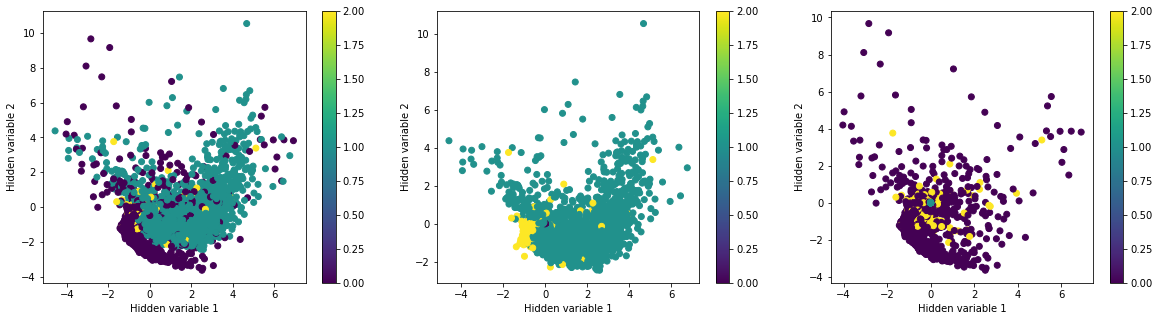

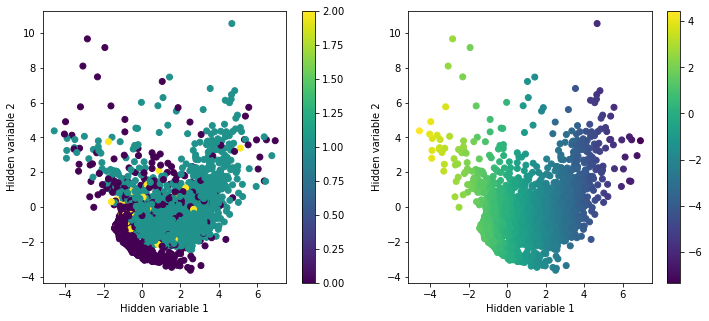

10000


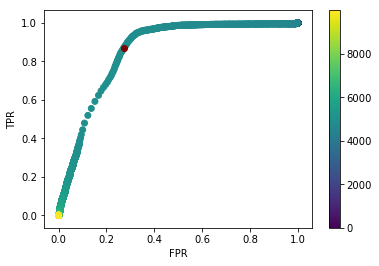

AUC: 0.850482053306
10000


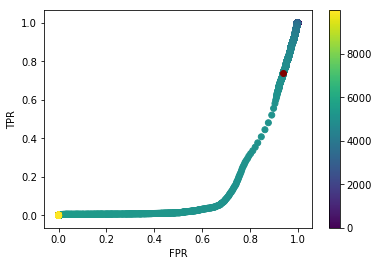

AUC: 0.149517946694
xunhuan =  1 this time, the AUC is: 0.850482053306
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7209.7253 - val_loss: -7778.0534
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7836.9405 - val_loss: -7775.2457
Epoch 3/50
12000/12000 [==============================] - 11s - loss: -7945.9990 - val_loss: -7957.4697
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7984.8379 - val_loss: -8031.8111
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -8004.0346 - val_loss: -7908.5890
Epoch 6/50
12000/12000 [==============================] - 11s - loss: -7998.3612 - val_loss: -8044.1355
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8021.1023 - val_loss: -8055.6249
Epoch 8/50
12000/12000 [==============================] - 11s - loss: -8030.7604 - val_loss: -7967.6258
Epoch 9/50
12000/12000 [========================

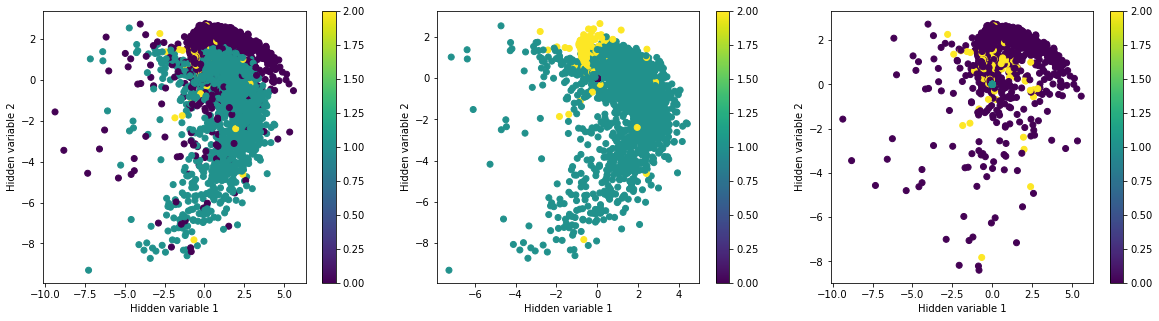

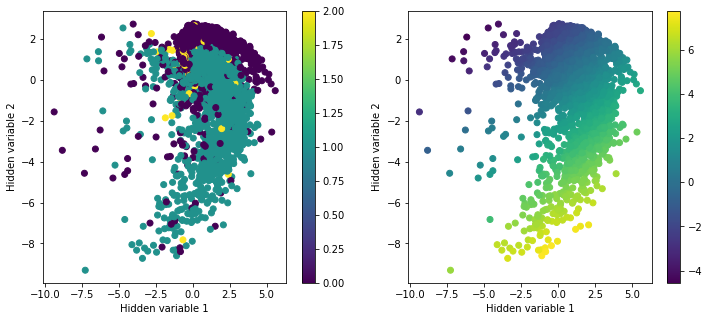

10000


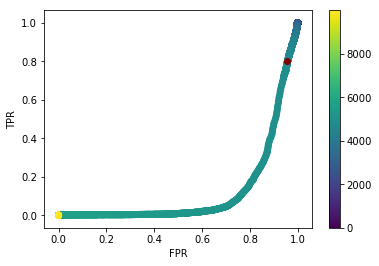

AUC: 0.118638005765
10000


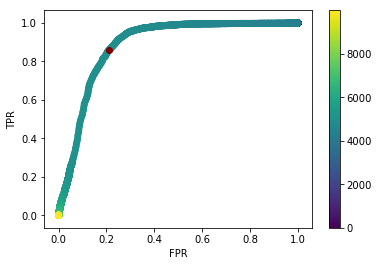

AUC: 0.881361994235
xunhuan =  2 this time, the AUC is: 0.881361994235
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7389.2007 - val_loss: -7810.4444
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7895.1886 - val_loss: -8046.4486
Epoch 3/50
12000/12000 [==============================] - 9s - loss: -7951.9498 - val_loss: -7987.0368
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7987.5833 - val_loss: -8031.4195
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -8013.5588 - val_loss: -8050.0908
Epoch 6/50
12000/12000 [==============================] - 11s - loss: -8014.0622 - val_loss: -7869.2818
Epoch 7/50
12000/12000 [==============================] - 11s - loss: -8018.1447 - val_loss: -8020.1736
Epoch 8/50
12000/12000 [==============================] - 11s - loss: -8027.5305 - val_loss: -8055.4100
Epoch 9/50
12000/12000 [==========================

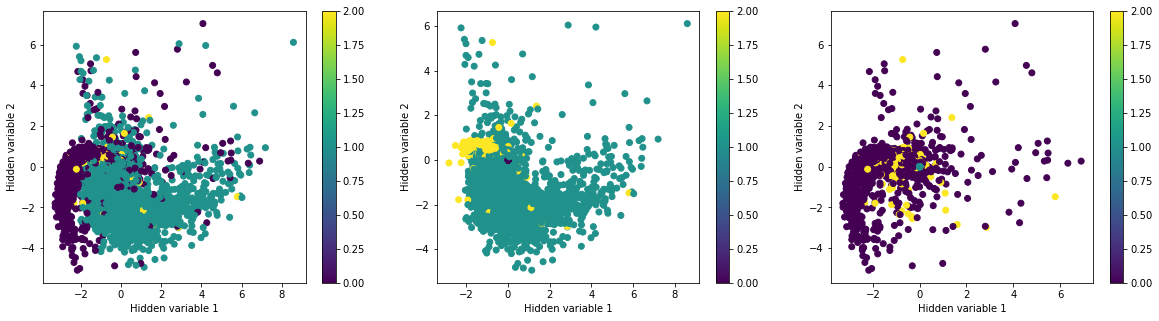

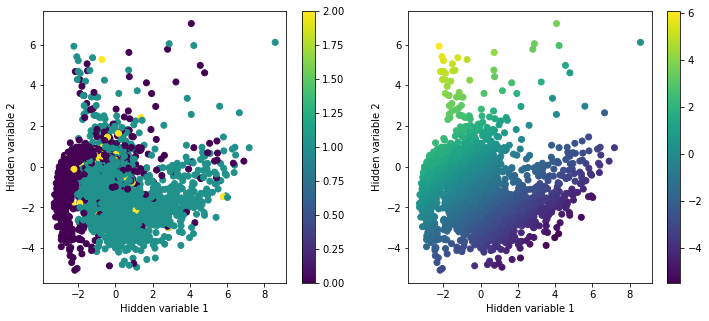

10000


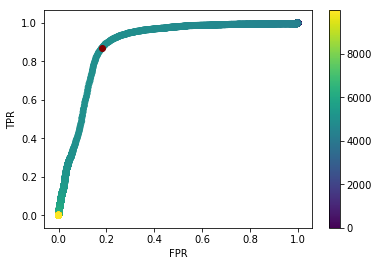

AUC: 0.885880089671
10000


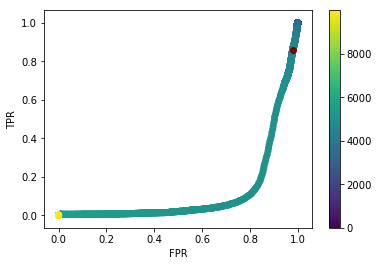

AUC: 0.114119910329
xunhuan =  3 this time, the AUC is: 0.885880089671
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7409.1695 - val_loss: -7885.9221
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7863.1907 - val_loss: -7877.7703
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7936.6130 - val_loss: -7858.2109
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7986.5321 - val_loss: -8038.7111
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -7991.8110 - val_loss: -8045.1462
Epoch 6/50
12000/12000 [==============================] - 11s - loss: -7994.2041 - val_loss: -8035.6566
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8019.9081 - val_loss: -8063.3989
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8020.0639 - val_loss: -8048.2899
Epoch 9/50
12000/12000 [========================

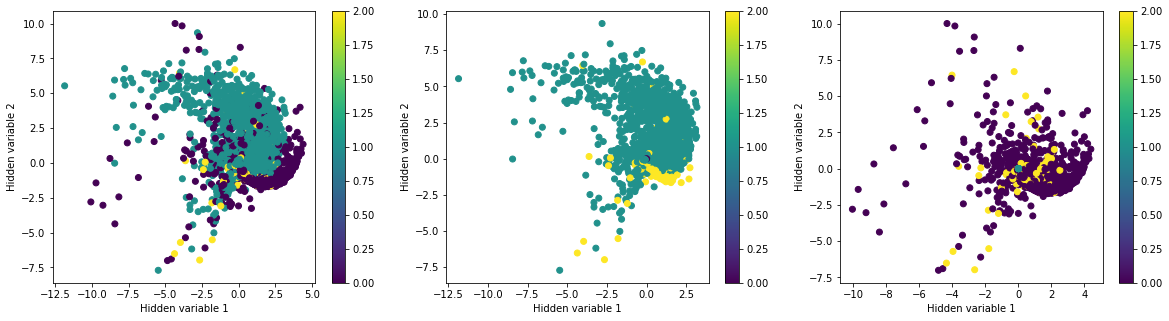

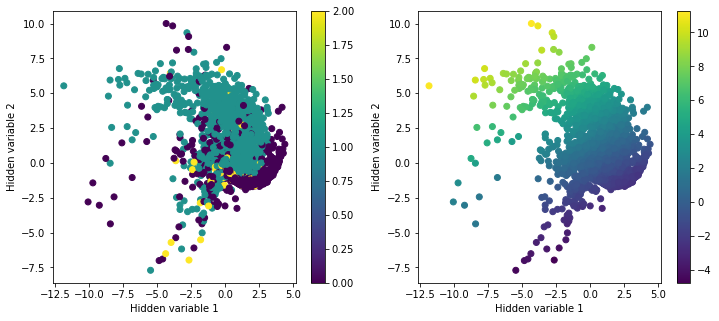

10000


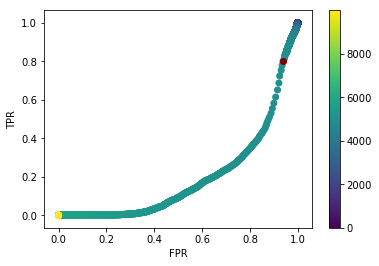

AUC: 0.195484939309
10000


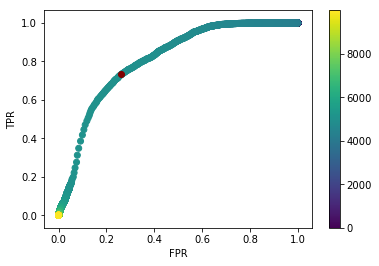

AUC: 0.804515060691
xunhuan =  4 this time, the AUC is: 0.804515060691
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 15s - loss: -7332.7253 - val_loss: -7695.3082
Epoch 2/50
12000/12000 [==============================] - 13s - loss: -7738.7840 - val_loss: -7964.6744
Epoch 3/50
12000/12000 [==============================] - 15s - loss: -7923.5055 - val_loss: -7812.7864
Epoch 4/50
12000/12000 [==============================] - 15s - loss: -7976.9165 - val_loss: -7946.9460
Epoch 5/50
12000/12000 [==============================] - 13s - loss: -8008.3260 - val_loss: -7698.5555
Epoch 6/50
12000/12000 [==============================] - 14s - loss: -8010.7106 - val_loss: -8005.9758
Epoch 7/50
12000/12000 [==============================] - 13s - loss: -8012.3118 - val_loss: -8031.2221
Epoch 8/50
12000/12000 [==============================] - 13s - loss: -8019.9462 - val_loss: -8057.4793
Epoch 9/50
12000/12000 [========================

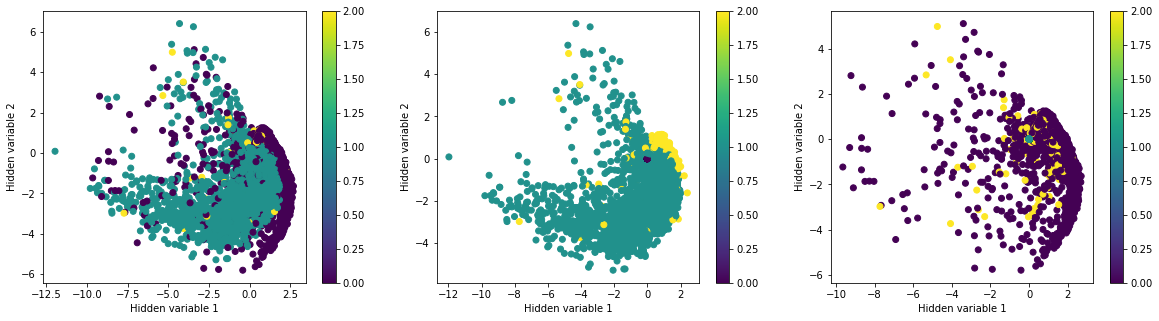

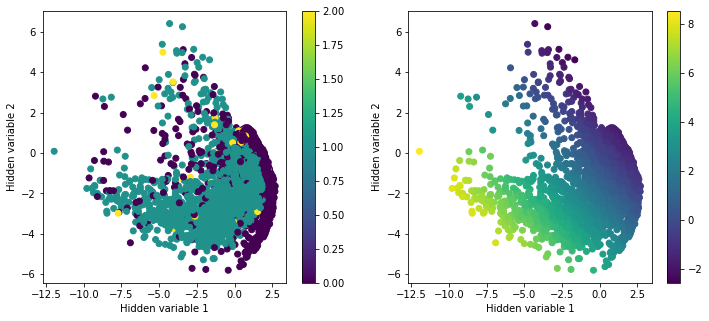

10000


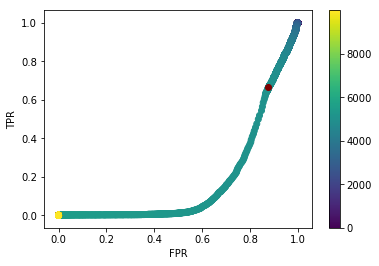

AUC: 0.178018216261
10000


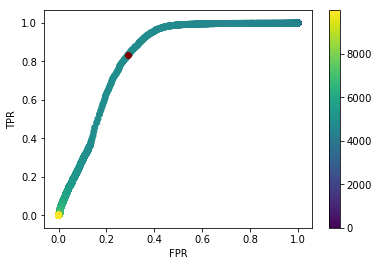

AUC: 0.821981783739
xunhuan =  5 this time, the AUC is: 0.821981783739
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -7401.7673 - val_loss: -7886.4761
Epoch 2/50
12000/12000 [==============================] - 11s - loss: -7872.2476 - val_loss: -8007.7992
Epoch 3/50
12000/12000 [==============================] - 11s - loss: -7950.1466 - val_loss: -7963.5633
Epoch 4/50
12000/12000 [==============================] - 11s - loss: -7968.7605 - val_loss: -7934.6044
Epoch 5/50
12000/12000 [==============================] - 11s - loss: -7994.3580 - val_loss: -8033.9456
Epoch 6/50
12000/12000 [==============================] - 11s - loss: -8016.0660 - val_loss: -8035.7892
Epoch 7/50
12000/12000 [==============================] - 13s - loss: -8005.1329 - val_loss: -8010.2549
Epoch 8/50
12000/12000 [==============================] - 13s - loss: -8027.5750 - val_loss: -8043.3441
Epoch 9/50
12000/12000 [========================

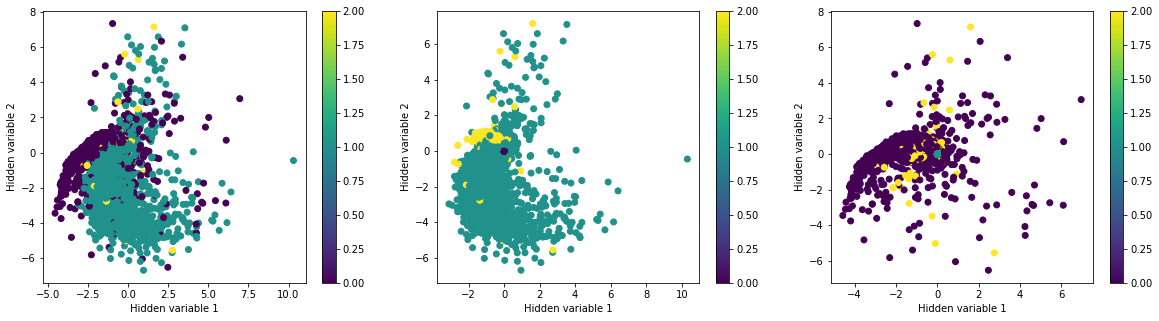

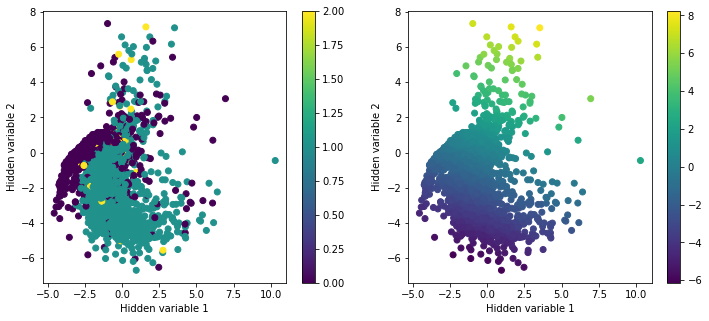

10000


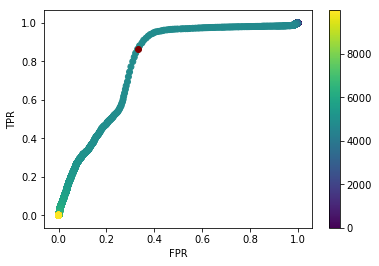

AUC: 0.788728496714
10000


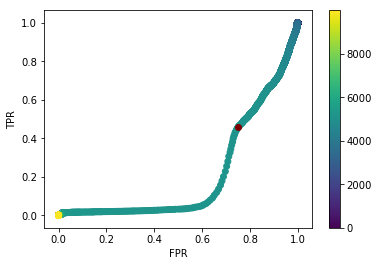

AUC: 0.211271503286
xunhuan =  6 this time, the AUC is: 0.788728496714
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 15s - loss: -6551.0729 - val_loss: -6721.1257
Epoch 2/50
12000/12000 [==============================] - 14s - loss: -6675.1610 - val_loss: -6764.1007
Epoch 3/50
12000/12000 [==============================] - 15s - loss: -7222.0339 - val_loss: -8015.9854
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7975.6723 - val_loss: -8020.3766
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7982.7505 - val_loss: -8030.7028
Epoch 6/50
12000/12000 [==============================] - 15s - loss: -8013.7171 - val_loss: -8008.6749
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8026.3064 - val_loss: -8054.0009
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8031.4169 - val_loss: -7924.9443
Epoch 9/50
12000/12000 [========================

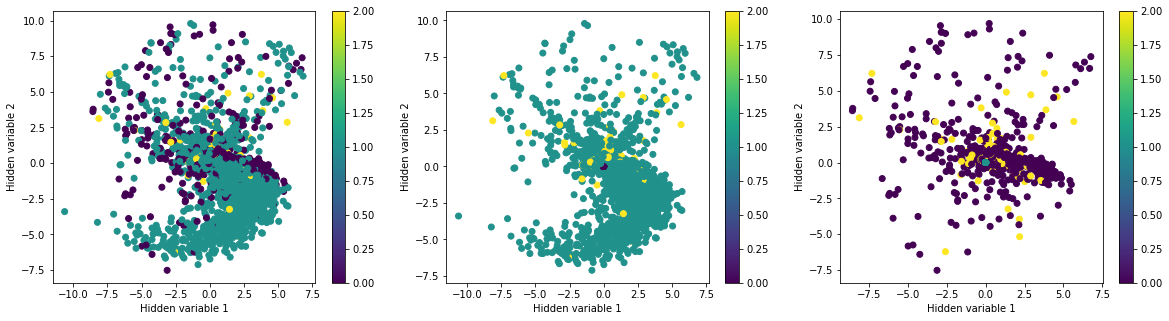

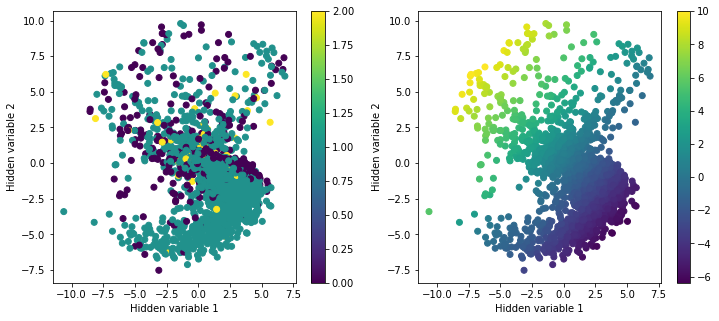

10000


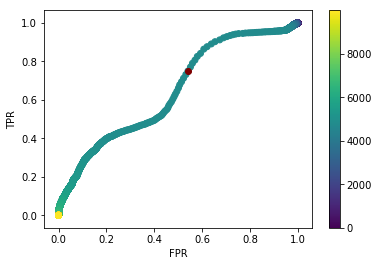

AUC: 0.646987379123
10000


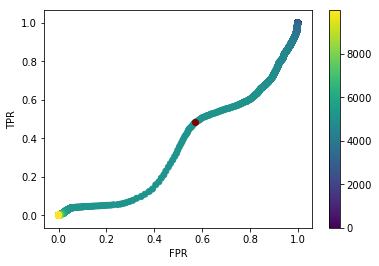

AUC: 0.353012620877
xunhuan =  7 this time, the AUC is: 0.646987379123
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 14s - loss: -7419.1442 - val_loss: -7958.2303
Epoch 2/50
12000/12000 [==============================] - 14s - loss: -7882.8635 - val_loss: -7963.5861
Epoch 3/50
12000/12000 [==============================] - 16s - loss: -7960.2031 - val_loss: -8035.9438
Epoch 4/50
12000/12000 [==============================] - 16s - loss: -7996.8871 - val_loss: -7975.7883
Epoch 5/50
12000/12000 [==============================] - 15s - loss: -8007.5866 - val_loss: -8035.9557
Epoch 6/50
12000/12000 [==============================] - 16s - loss: -8012.0779 - val_loss: -8023.0724
Epoch 7/50
12000/12000 [==============================] - 15s - loss: -8014.7073 - val_loss: -7930.5516
Epoch 8/50
12000/12000 [==============================] - 13s - loss: -8001.8195 - val_loss: -8047.0175
Epoch 9/50
12000/12000 [========================

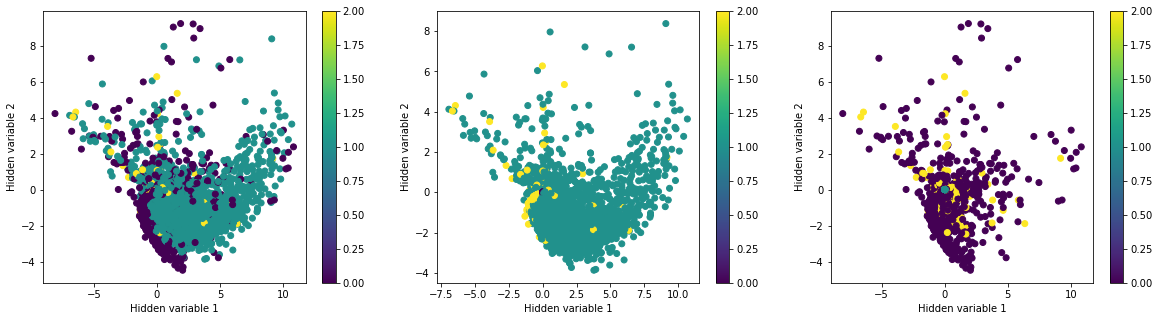

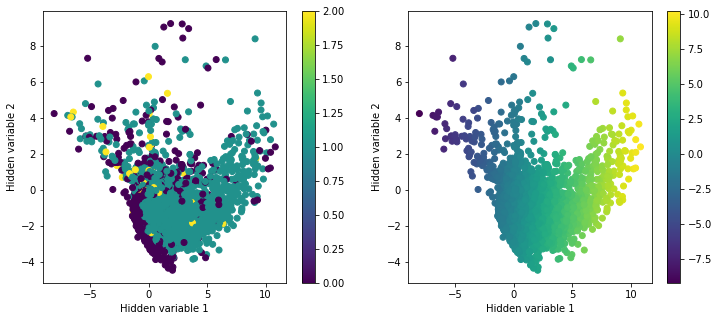

10000


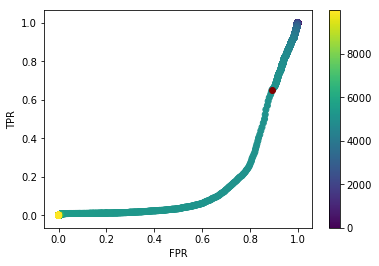

AUC: 0.169545008697
10000


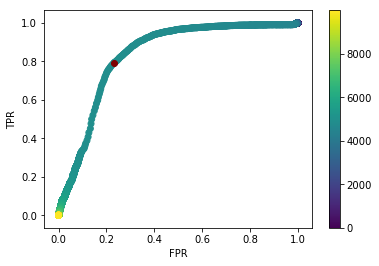

AUC: 0.830454991303
xunhuan =  8 this time, the AUC is: 0.830454991303
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7348.4292 - val_loss: -7850.3394
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7879.4465 - val_loss: -7978.9481
Epoch 3/50
12000/12000 [==============================] - 11s - loss: -7967.2300 - val_loss: -8028.9628
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -8001.9227 - val_loss: -8025.2568
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -8003.5474 - val_loss: -8042.4851
Epoch 6/50
12000/12000 [==============================] - 11s - loss: -8017.2849 - val_loss: -8053.7877
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8020.6113 - val_loss: -8011.6277
Epoch 8/50
12000/12000 [==============================] - 11s - loss: -8031.2466 - val_loss: -8058.2754
Epoch 9/50
12000/12000 [========================

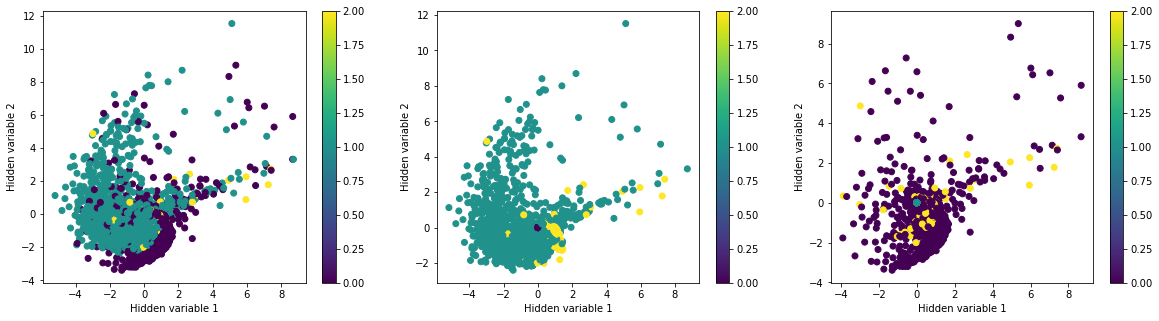

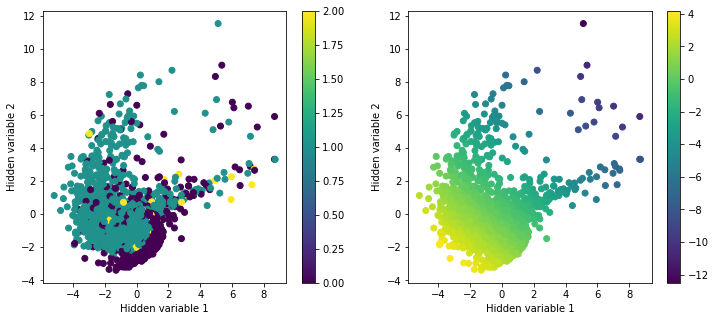

10000


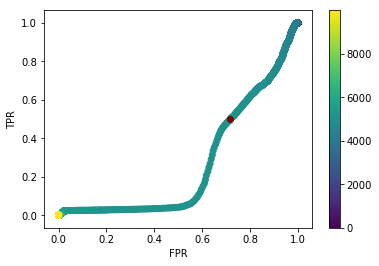

AUC: 0.263934303498
10000


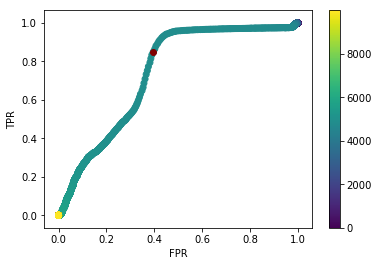

AUC: 0.736065696502
xunhuan =  9 this time, the AUC is: 0.736065696502


In [4]:
AUC_all = []
for xunhuan in range(10):
    batch_size =100
    latent_dim = 2
    nb_epoch = 50  
    epsilon_std = 0.1  
    intermediate_dim =256
    original_dim = 64*64

    #USE = 'autoencoder'
    USE = 'vae'
    #encoder:

    input_img = Input(shape=(64,64,3))


    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(input_img)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    #x = Conv2D(5, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    #x = MaxPooling2D((2, 2),  padding='same')(x)

    visual = Flatten()(x)
    h_1 = Dense(intermediate_dim, activation='tanh')(visual)
    encoded = Dense(latent_dim, activation='relu')(h_1)

    #z_mean = Dense(latent_dim)(h_1)
    z_mean = Dense(latent_dim)(h_1)
    z_log_var = Dense(latent_dim)(h_1)

    def sampling(args):   
        z_mean, z_log_var = args  
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
        return z_mean + K.exp(z_log_var / 2)* epsilon

    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    if USE == 'vae':
        h_3 = Dense(intermediate_dim,activation='tanh')(z)#for VAE

    if USE == 'autoencoder':
        h_3 = Dense(intermediate_dim,activation='tanh')(encoded)#for AE


    h_4 = Dense(20*2*2,activation='relu')(h_3)
    h_5 = Reshape((2,2,20))(h_4)


    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(h_5)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(80,  (3, 3), activation='tanh',padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    decoded = Conv2D(3, (3, 3), activation='tanh', padding='same')(x)

    EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')


    #def vae_loss(x, decoded):  
    #    xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)
    #    kl_loss_1 = -K.sum(K.square(0 - (z_mean)), axis=-1)
    #    kl_loss_2 = K.sum(K.abs(1- K.exp(z_log_var)), axis=-1)
    #    return 1*xent_loss + 0.5*kl_loss_1 + 1*kl_loss_2  
    ### PW loss:
    def vae_loss(x, decoded):  
        xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)#the cross entropy loss, can also use MSE
        w_loss_d1_mean = K.sum(K.square((z_mean)), axis=-1) #first part of PW loss
        m = K.constant(1) #hyperparameter: mean
        s = K.constant(1) #hyperparameter: std
        w_loss_d1_var = K.sum((        
            K.exp(-K.square(m/s)-K.square(z_mean)/K.constant(2)/(K.square(s)+K.exp(z_log_var)))*
                (
                -K.constant(2*np.sqrt(2))*K.exp((m*(-K.constant(2)*z_mean*K.square(s)+m*(K.square(s)+K.constant(2)*K.exp(z_log_var))))/(K.constant(2)*K.square(s)*(K.square(s)+K.exp(z_log_var))))
                -K.constant(2*np.sqrt(2))*K.exp((m*(K.constant(2)*z_mean*K.square(s)+m*(K.square(s)+K.constant(2)*K.exp(z_log_var))))/(K.constant(2)*K.square(s)*(K.square(s)+K.exp(z_log_var))))
                +K.exp(z_log_var/2)*K.exp((K.square(z_mean))/(K.constant(2)*(K.square(s)+K.exp(z_log_var))))*K.sqrt(K.constant(1)/K.square(s)+K.constant(1)/K.exp(z_log_var))
                +K.exp(K.square(m/s)+(K.square(z_mean))/(K.constant(2)*(K.square(s)+K.exp(z_log_var))))*K.exp(z_log_var/2)*s*(K.constant(1)/s+K.constant(2)/K.exp(z_log_var/2))*K.sqrt(K.constant(1)/K.square(s)+K.constant(1)/K.exp(z_log_var))
                )
            )
            /(K.constant(4)*K.constant(np.sqrt(np.pi))*s*K.exp(z_log_var/2)*K.sqrt(K.constant(1)/K.square(s)+K.constant(1)/K.exp(z_log_var))), axis=-1)
        #second part of PW loss
        return 1*xent_loss +w_loss_d1_mean+w_loss_d1_var 


    def ae_loss(x, decoded):  
        xent_loss = original_dim * objectives.mean_squared_error(x,decoded)
        return xent_loss

    if USE == 'vae':
        vae = Model(inputs=input_img, outputs=decoded) 
        vae.compile(optimizer='rmsprop', loss=vae_loss) 
        vae.fit(train_data[:12000], train_data[:12000],
                shuffle=True,
                epochs=50,
                batch_size=batch_size,
                validation_data=(train_data[12000:14100],train_data[12000:14100]),callbacks=[EarlyStopping])    

    lower_lim = 0
    upper_lim = 14100

    label_value = np.zeros(len(train_label))
    for i in range(len(label_value)):
        label_value[i] =np.argmax(train_label[i])

    vis = Model(input_img, z_mean)

    # display a 2D plot of the digit classes in the latent space  
    x_vis = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)

    x_vis_1 = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)  
    x_vis_1[label_value[lower_lim:upper_lim]<1]=0

    x_vis_2 = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)  
    x_vis_2[label_value[lower_lim:upper_lim]==1]=0

    plt.figure(figsize=(20, 5))

    ax = plt.subplot(1,3,1)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,3,2)
    plt.scatter( x_vis_1[:, 0] ,x_vis_1[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,3,3)
    plt.scatter( x_vis_2[:, 0] ,x_vis_2[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    plt.show()
    
    lower_lim = 0
    upper_lim = 14100


    vis = Model(input_img, z_mean)
    # display a 2D plot of the digit classes in the latent space
    x_vis = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)
    n_neighbors = 10
    n_components = 1
    isomap = manifold.Isomap(n_neighbors, n_components)
    hid_pred = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)
    Y_pred = isomap.fit_transform(hid_pred)


    plt.figure(figsize=(12, 5))

    ax = plt.subplot(1,2,1)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,2,2)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=Y_pred)
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    plt.show()
    
    
    Y_pred = -Y_pred
    thr_min = -15
    thr_max = 15
    test_accuracy = 0.003
    test_range = int((thr_max - thr_min)/test_accuracy)
    print(test_range)
    FP = []
    TP = []
    TN = []
    FN = []
    TA = np.ones((Y_pred.shape[0],))
    TA[Class[lower_lim:upper_lim] ==0 ] = 0
    TA[Class[lower_lim:upper_lim] ==2 ] = 0

    for i in range(test_range):
        FP_temp = np.zeros((Y_pred.shape[0]))
        TP_temp = np.zeros((Y_pred.shape[0]))
        TN_temp = np.zeros((Y_pred.shape[0]))
        FN_temp = np.zeros((Y_pred.shape[0]))
        LA = np.zeros((Y_pred.shape[0],))
        thr_now = thr_min+ i*test_accuracy
        LA[Y_pred[:,0] > thr_now] = 1
        for j in range(Y_pred.shape[0]):
            if LA[j]==0:
                if TA[j]==1:
                    FN_temp[j] = 1
                else:
                    TN_temp[j] = 1
            else:
                if TA[j] == 1:
                    TP_temp[j] = 1
                else:
                    FP_temp[j] = 1
        FP.append(FP_temp)
        TP.append(TP_temp)
        TN.append(TN_temp)
        FN.append(FN_temp)

    TPR = np.zeros((test_range,))
    FPR = np.zeros((test_range,))
    TPR = np.sum(TP,axis=-1)/(np.sum(TP,axis=-1)+np.sum(FN,axis=-1))
    FPR = np.sum(FP,axis=-1)/(np.sum(FP,axis=-1)+np.sum(TN,axis=-1))

    plt.scatter(FPR,TPR,c=[i for i in range(test_range)])

    plt.colorbar()
    plt.scatter(FPR[np.argmin((TPR-1)**2 + FPR**2)],TPR[np.argmin((TPR-1)**2 + FPR**2)],c=0,cmap='OrRd_r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    #argmax, OrRed

    print("AUC:",metrics.auc(FPR, TPR))
    AUC_1 = metrics.auc(FPR, TPR)
    
    Y_pred = -Y_pred
    thr_min = -15
    thr_max = 15
    test_accuracy = 0.003
    test_range = int((thr_max - thr_min)/test_accuracy)
    print(test_range)
    FP = []
    TP = []
    TN = []
    FN = []
    TA = np.ones((Y_pred.shape[0],))
    TA[Class[lower_lim:upper_lim] ==0 ] = 0
    TA[Class[lower_lim:upper_lim] ==2 ] = 0

    for i in range(test_range):
        FP_temp = np.zeros((Y_pred.shape[0]))
        TP_temp = np.zeros((Y_pred.shape[0]))
        TN_temp = np.zeros((Y_pred.shape[0]))
        FN_temp = np.zeros((Y_pred.shape[0]))
        LA = np.zeros((Y_pred.shape[0],))
        thr_now = thr_min+ i*test_accuracy
        LA[Y_pred[:,0] > thr_now] = 1
        for j in range(Y_pred.shape[0]):
            if LA[j]==0:
                if TA[j]==1:
                    FN_temp[j] = 1
                else:
                    TN_temp[j] = 1
            else:
                if TA[j] == 1:
                    TP_temp[j] = 1
                else:
                    FP_temp[j] = 1
        FP.append(FP_temp)
        TP.append(TP_temp)
        TN.append(TN_temp)
        FN.append(FN_temp)

    TPR = np.zeros((test_range,))
    FPR = np.zeros((test_range,))
    TPR = np.sum(TP,axis=-1)/(np.sum(TP,axis=-1)+np.sum(FN,axis=-1))
    FPR = np.sum(FP,axis=-1)/(np.sum(FP,axis=-1)+np.sum(TN,axis=-1))

    plt.scatter(FPR,TPR,c=[i for i in range(test_range)])

    plt.colorbar()
    plt.scatter(FPR[np.argmin((TPR-1)**2 + FPR**2)],TPR[np.argmin((TPR-1)**2 + FPR**2)],c=0,cmap='OrRd_r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    #argmax, OrRed

    print("AUC:",metrics.auc(FPR, TPR))
    AUC_2 = metrics.auc(FPR, TPR)
    AUC = AUC_2
    if AUC_1>AUC_2:
        AUC = AUC_1
    print("xunhuan = ",xunhuan,"this time, the AUC is:",AUC)
    AUC_all.append(AUC)    

MEAN AUC =  0.813112063749


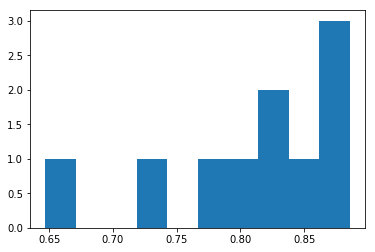

In [5]:
AUC_all = np.asarray(AUC_all)
print("MEAN AUC = ",np.mean(AUC_all))
plt.hist(AUC_all)
plt.show()